<a href="https://colab.research.google.com/github/lin-k23/RISCA/blob/main/simulator1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/lin-k23/RISCA/blob/main/simulator1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

RISCA

## Install Dependencies

In [1]:
%pip install numpy matplotlib seaborn pandas
!git clone https://github.com/lin-k23/SAR_ADC.git

%cd SAR_ADC/script/
from preset_mdl import preset_mdl
from preset_pr import preset_pr
from signal_source import signal_source
from RISCA_core import RISCA_core
from analyser.analyser import AnalyserSar
from util.load_assembler_xlsx import load_assembler_xlsx
import pandas as pd
import os

Cloning into 'SAR_ADC'...
remote: Enumerating objects: 247, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 247 (delta 129), reused 200 (delta 82), pack-reused 0 (from 0)
Receiving objects: 100% (247/247), 1.71 MiB | 4.41 MiB/s, done.
Resolving deltas: 100% (129/129), done.
/content/SAR_ADC/script


## Initialize Configuration Information

In [15]:
mdl = preset_mdl()
pr = preset_pr()
pr['conf_name'] = input("sar/tisar/pipesar2s/nssar1o1c/nssar1o1ccp\n")
config_file_path = os.path.join(path_config,pr['conf_name'])
print(config_file_path)
pr_loaded = load_assembler_xlsx(config_file_path)
# update pr with pr_loaded
pr.update(pr_loaded)
if "T_assembler" in pr:
    print("Loaded Excel configuration:\n")
cfg_info = pd.DataFrame(pr["T_assembler"])
styled_df = cfg_info.style\
            .set_table_attributes('class="dataframe table table-striped"')\
            .set_properties(**{'text-align': 'center'})\
            .set_caption(f'Configuration Information for {pr["conf_name"]}')
styled_df

sar/tisar/pipesar2s/nssar1o1c/nssar1o1ccp
tisar
../config/tisar
Loading file: ../config/tisar/timing_table.xlsx
[util.load_assembler_xlsx] TI parameter loaded: pr["TI"]= 3
Loaded Excel configuration:



,frame1,frame2,frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB
CB2,LSB,OUT RST SAM1,MSB
CB3,MSB,LSB,OUT RST SAM1


## Input signal & Analysis conversion results

In [10]:
# 定义输入信号峰值
v_in_peak = [0.85, 0]
# 调用 signal_source 函数
v_in_p, v_in_n = signal_source(pr, mdl, v_in_peak)
# Instantiate the device under test
da = RISCA_core(mdl, pr, v_in_p, v_in_n)

## Run Analysis

offset_nocal = -0.48 LSB


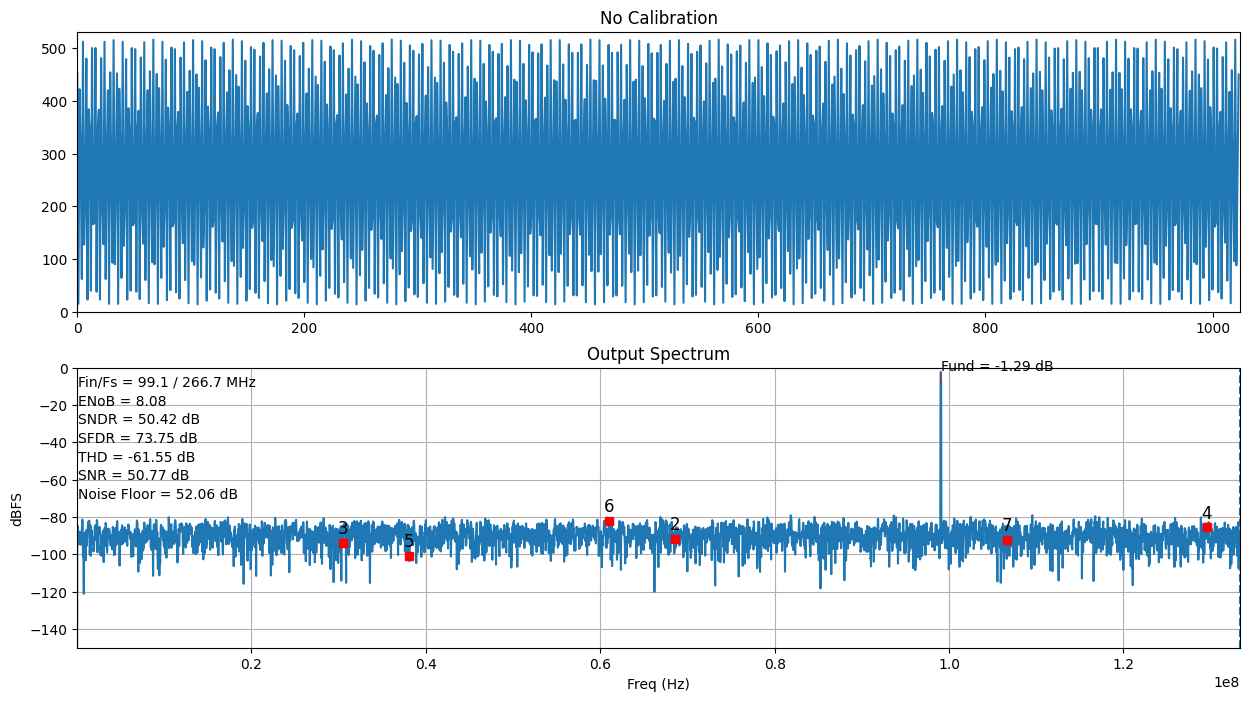

In [11]:
test = AnalyserSar(da, pr)
test.no_calibration()